In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

# 1) Loading and Viewing the Dataset

In [3]:
#We load the dataset and look at the overall statistics such as mean, count, and median.

musicdata = pd.read_csv("SpotifyFeatures.csv")
musicdata


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [4]:
musicdata.info()
musicdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# 2) Data Cleaning

In [5]:
#Checking for NULL values
#Since there is none, we can continue

pd.isnull(musicdata).sum()


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

# Remove high entropy features

In general, entropy is a measure for pureness, for certainty. Similar values in a feature suggest low entropy, and diverse - high entropy. The higher entropy, the less predictive properties this feature has. For instance, "track_name" holds information about a song's name. These are unique (see the code line below) for each sample, thus could not be used for modelling.

In [6]:
len(musicdata["track_name"].unique())

148615

In [7]:
# Checking for and removing duplicates

musicdata.duplicated().any()
duplicated = musicdata.duplicated()

In [8]:
# Duplicate rows shown below , no duplicates found

musicdata[duplicated]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


# 3) Exploratory Analysis

Looking at the top 20 artists with the most number of songs

In [9]:
artists = musicdata["artist_name"].value_counts()[:20].sort_values(ascending = True)

In [10]:
artists

Alan Menken                 420
Frédéric Chopin             436
John Williams               450
Henri Salvador              474
Drake                       477
Howard Shore                479
Chorus                      480
Gioachino Rossini           491
Hans Zimmer                 559
Ludwig van Beethoven        596
Johann Sebastian Bach       632
Juice Music                 684
Georges Bizet               701
Randy Newman                757
Wolfgang Amadeus Mozart     800
Richard Wagner              804
Nobuo Uematsu               825
Kimbo Children's Music      971
Giacomo Puccini            1137
Giuseppe Verdi             1394
Name: artist_name, dtype: int64

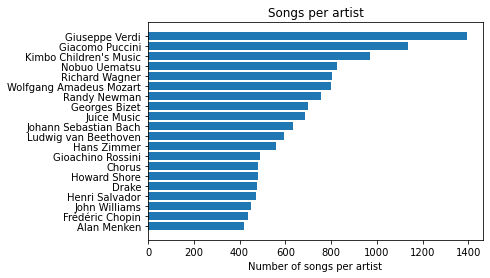

In [11]:
plt.barh(artists.index, artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

Many composers (e.g., Mozart, Beethoven, etc.) also found their place in this list. Now, to avoid large number of features, the artist_name is removed.

The new dataset is then labelled as music.

In [12]:
music = musicdata.drop(columns=["track_id","track_name","artist_name"])



Visualizing Data

Visualizing counts and distributions simplify overview and understanding of data. The plots below show counts in each class in the three categorical features.

In [13]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = music, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

The plot below shows how many times each key present in the dataset. The most frequent one is "C" and the least frequent one is "D#"

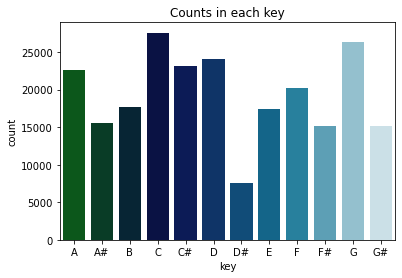

In [14]:
plot_counts("key", ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"])

The plot below shows the time_signature in all songs of the dataset

Almost all the songs have 4/4 time_signature.

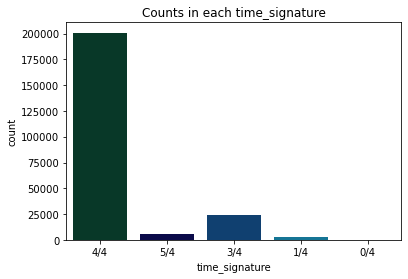

In [15]:
plot_counts("time_signature")

The plot below shows the mode in all songs of the dataset.

Majority of the songs are in "major" mode.

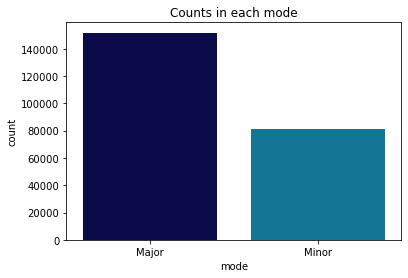

In [16]:
plot_counts("mode")

The plot below shows the genre of songs

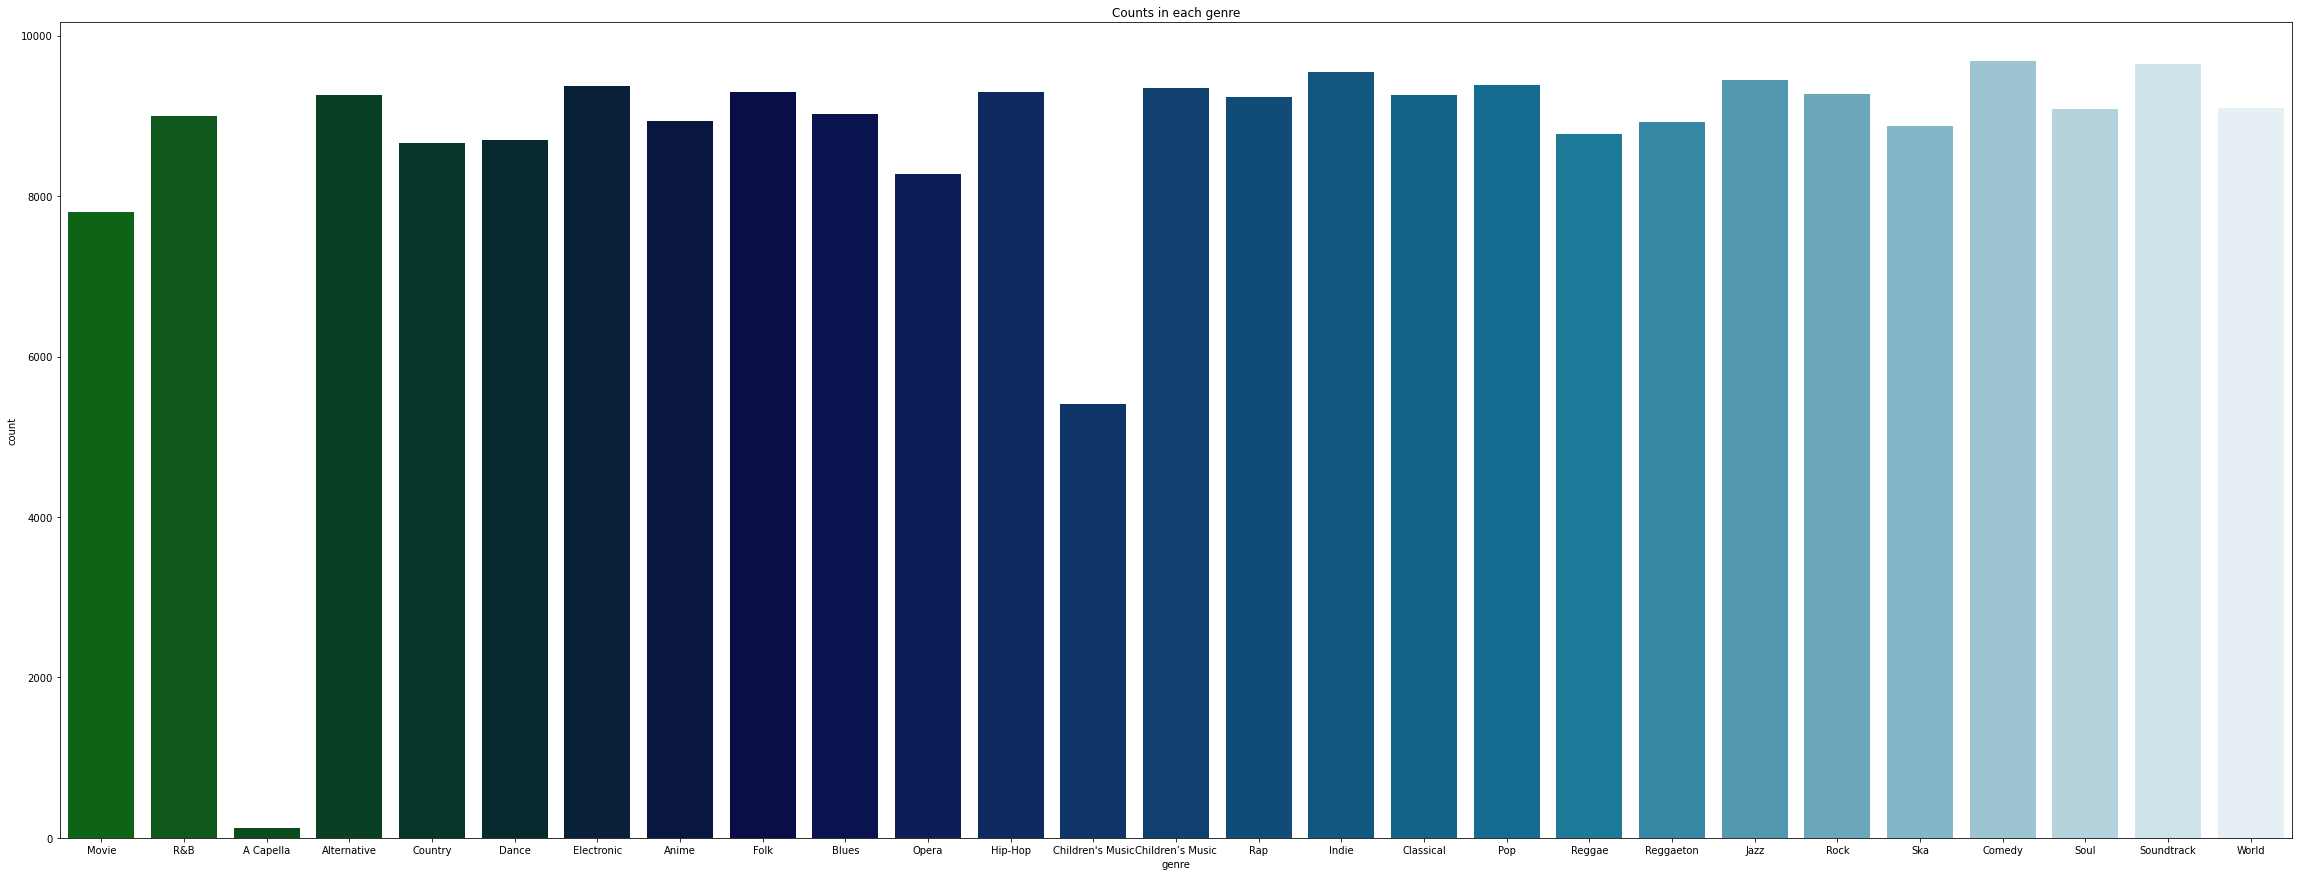

In [17]:
plt.figure(figsize = (40, 15))
plot_counts("genre")

The plot shows that A Capella has the lowest amount of songs while the rest of the genres apart from Children's Music are about equal.

We then move on to looking at the continous variables.

Distribution of continuous values in numeric features is displayed on subplots to spare time and space.

The plot below shows the distribution of songs acousticness 

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

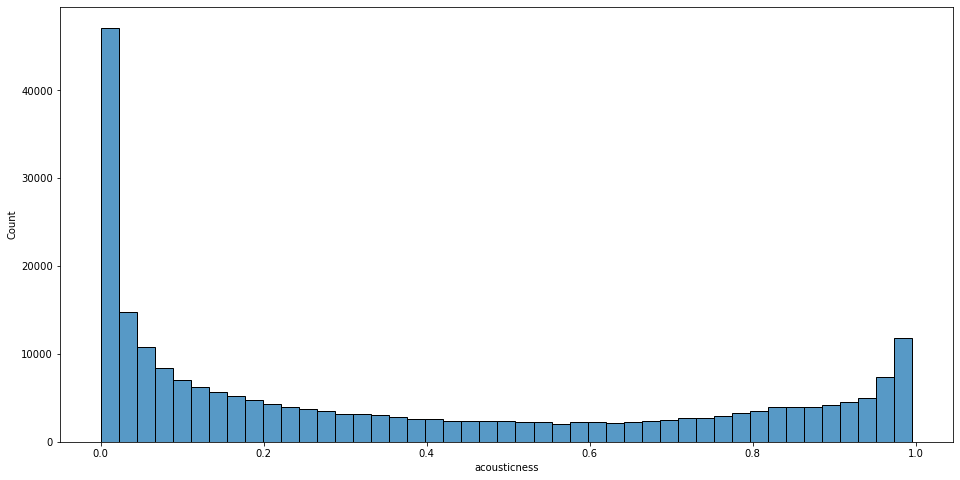

In [18]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["acousticness"])

The plot below shows the distribution of songs energy

<AxesSubplot:xlabel='energy', ylabel='Count'>

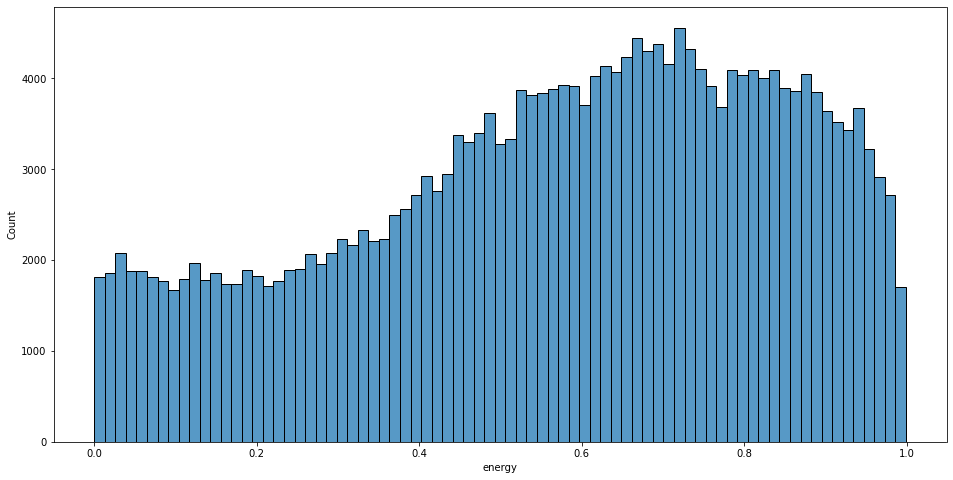

In [19]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["energy"])

The plot below shows the distribution of songs popularity

<AxesSubplot:xlabel='popularity', ylabel='Count'>

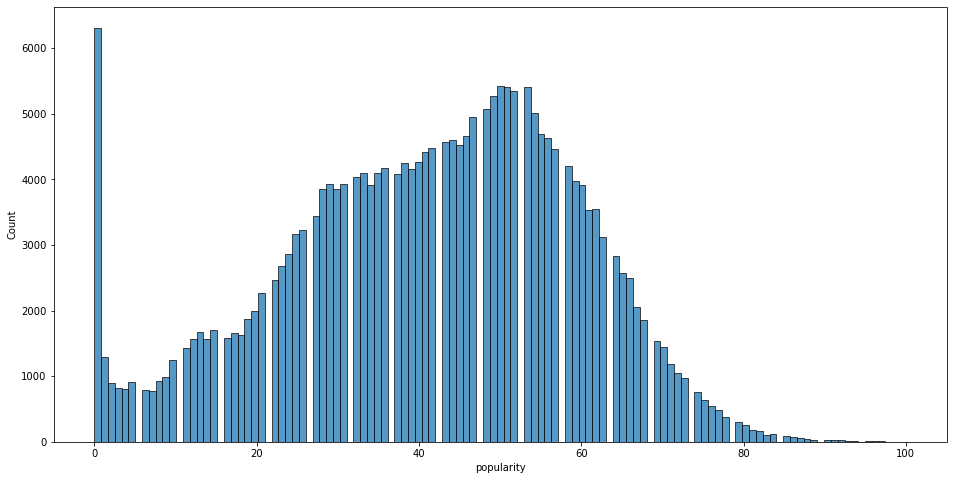

In [20]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["popularity"])

The plot below shows the distribution of songs danceability

<AxesSubplot:xlabel='danceability', ylabel='Count'>

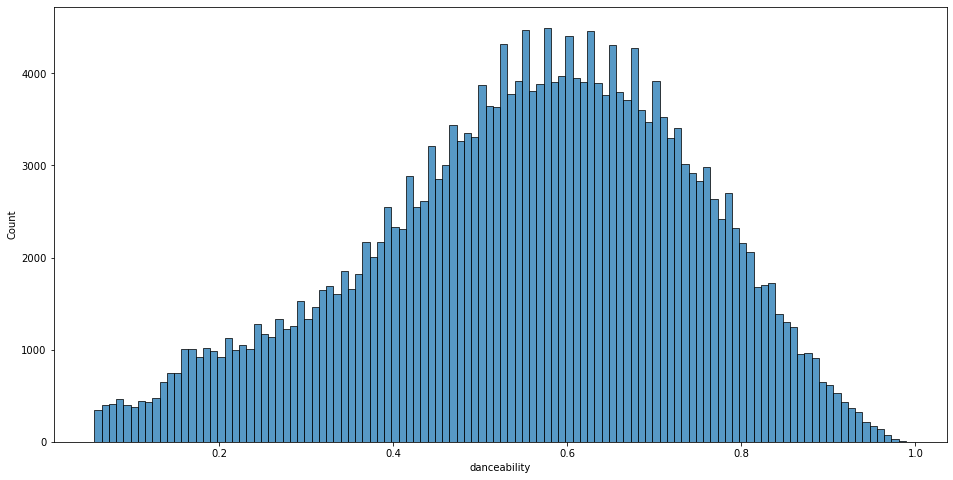

In [21]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["danceability"])

The plot below shows the distribution of songs duration (ms)

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

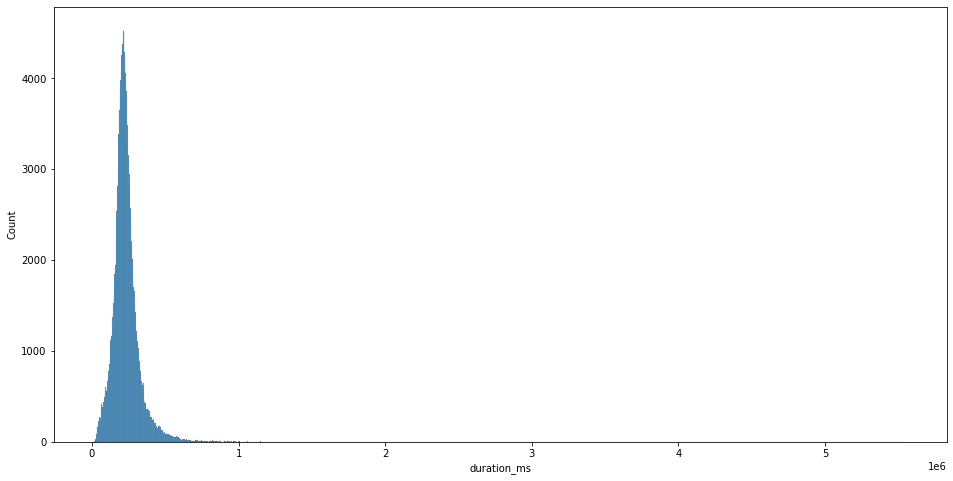

In [22]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=musicdata["duration_ms"])


The plot below shows the distribution of songs instrumentalness

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

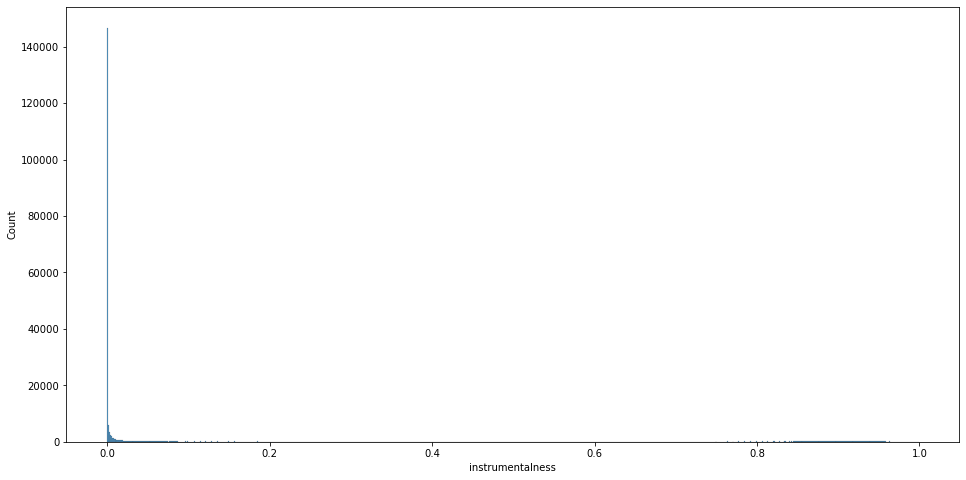

In [23]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=musicdata["instrumentalness"])

In the Dataset, More than 90% of the data has around 0.01 instrumentalness. There seems to be no distinct relation which doesn't help us in predicting genre. Hence, we will remove instrumentalness from our dataset.

Updated dataset established as music

In [24]:
music = musicdata.drop(columns=["track_id","track_name","artist_name","instrumentalness"])
music.head()


,genre,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,1,0.246,0.590,137373,0.737,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,3,0.952,0.663,170267,0.131,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.703,0.240,152427,0.326,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,4,0.950,0.331,82625,0.225,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


The plot below shows the distribution of songs liveness

<AxesSubplot:xlabel='liveness', ylabel='Count'>

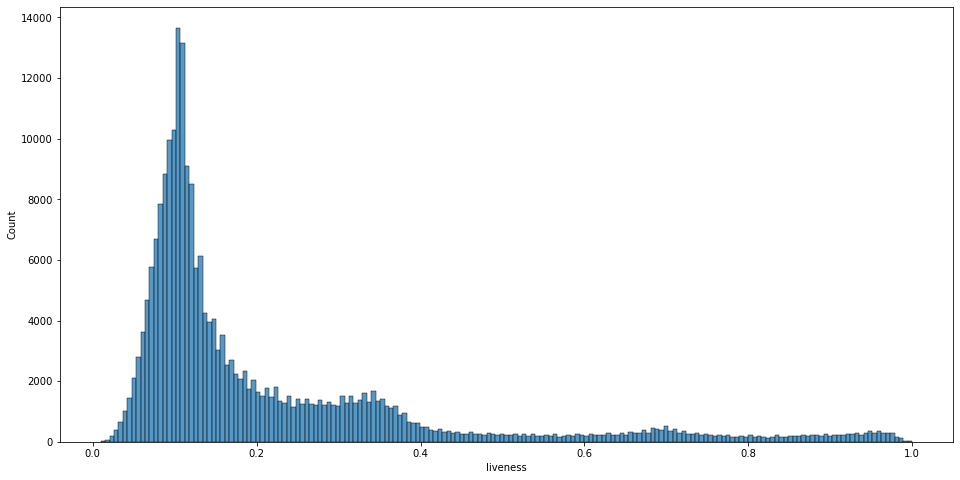

In [25]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["liveness"])

The plot below shows the distribution of songs loudness

<AxesSubplot:xlabel='loudness', ylabel='Count'>

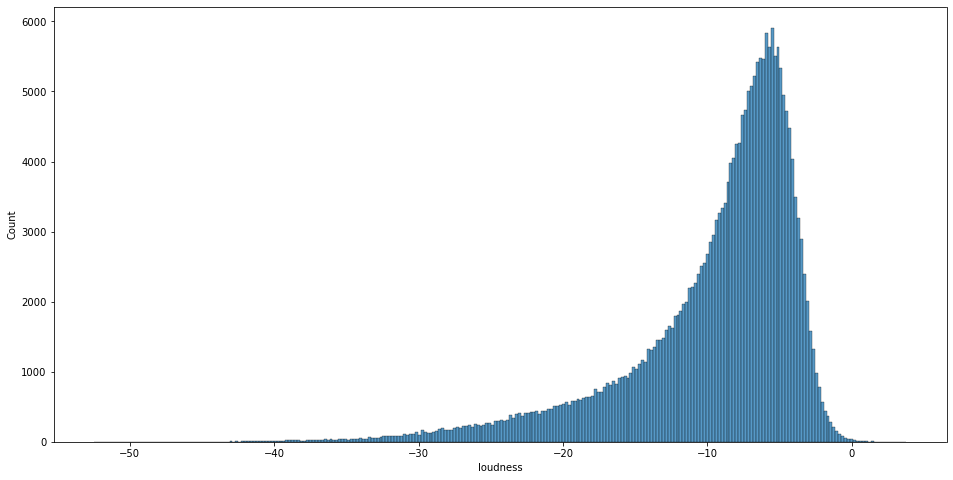

In [26]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["loudness"])

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

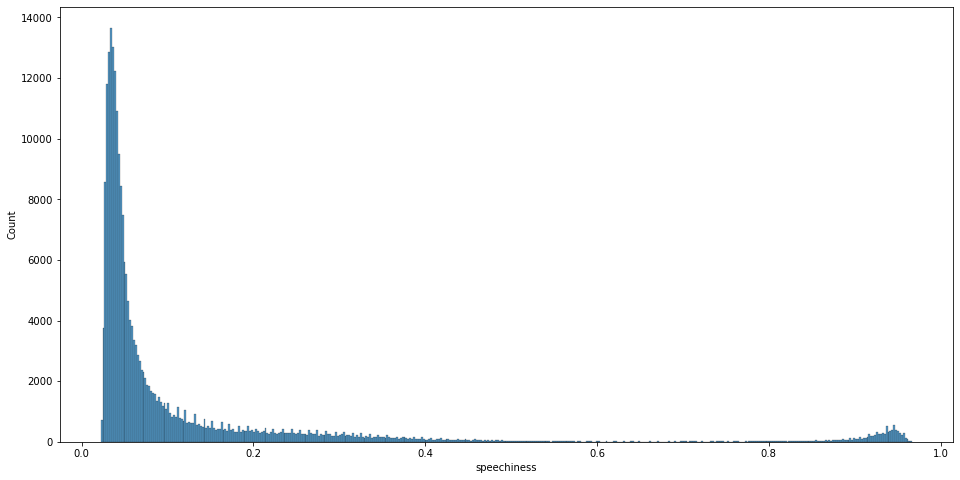

In [27]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["speechiness"])

<AxesSubplot:xlabel='tempo', ylabel='Count'>

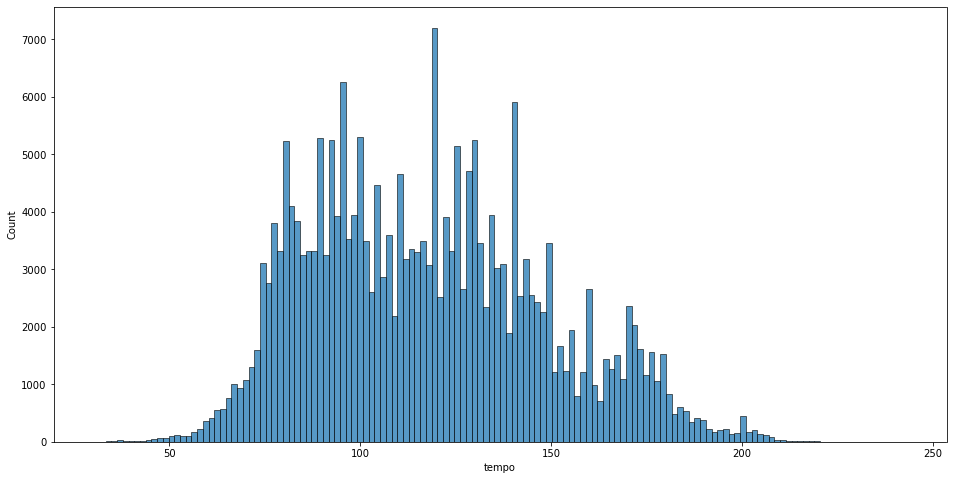

In [28]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["tempo"])

<AxesSubplot:xlabel='valence', ylabel='Count'>

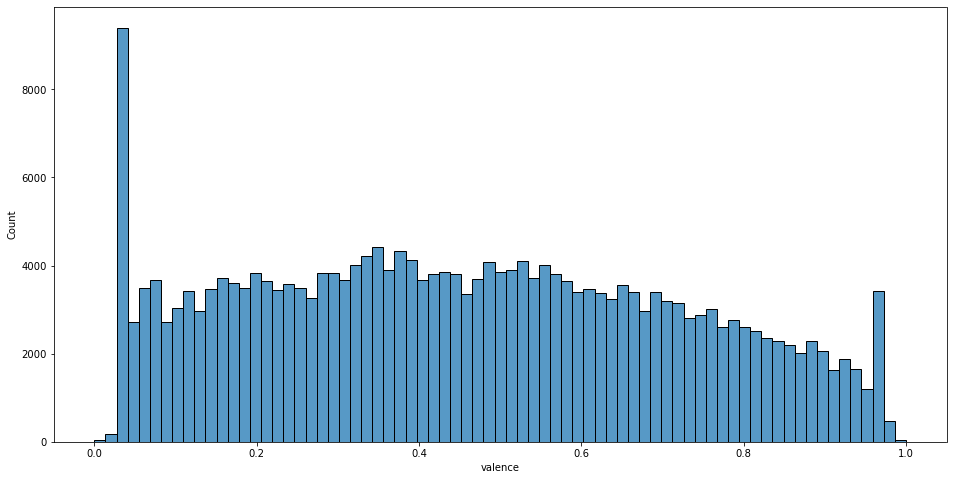

In [29]:
f = plt.figure(figsize=(16,8))
sns.histplot(data=music["valence"])

Only "instrumentalness," which makes up more than 90% of the data, has an unusual structure in the histograms; the average instrumentality is 0.01. There doesn't appear to be a clear relationship, which makes it difficult for us to forecast genre. We will therefore take instrumentality out of our dataset. With the exception of "speechiness," "loudness," and "liveliness," the data distribution appears to be fairly even for the others. At some point, "acousticness," "popularity," and "valence" all have remarkably high tallies. After examining the data distribution for each variable, we will next look for any relations between the distribution and the different types of genre.  

Now, we will look at the correlation between song genre and every variable. Variables with high correlation will be the predictors for our response. 

Below are the boxplots showing the correlation between song genres and acousticness

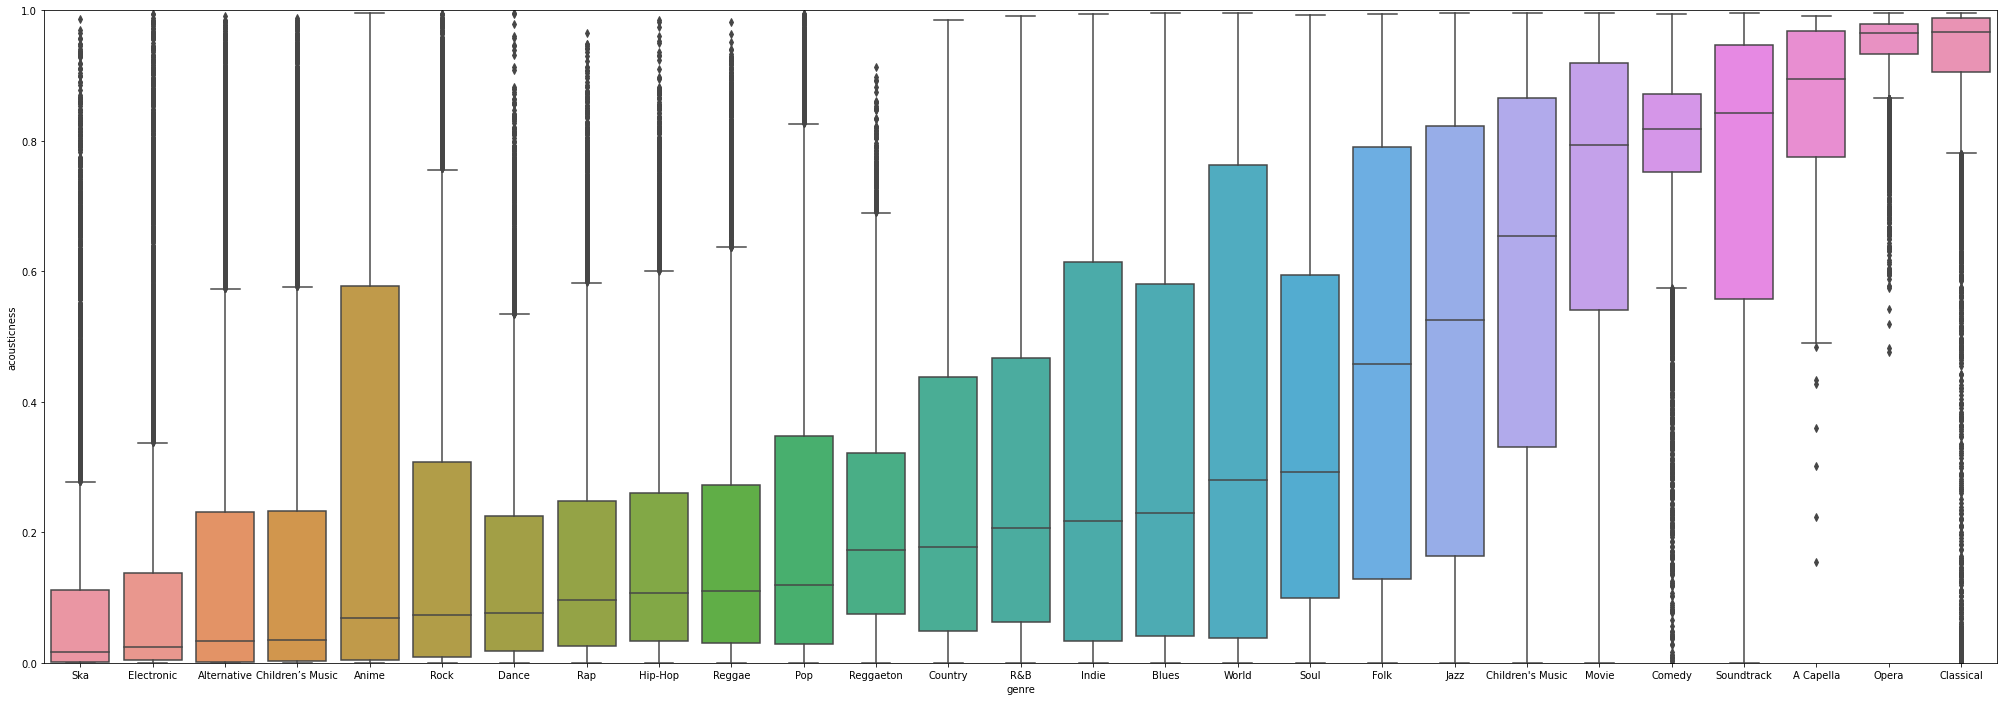

In [30]:
group_means=music.groupby(['genre'])['acousticness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,1.0)
sns.boxplot(x='genre', y='acousticness', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and energy

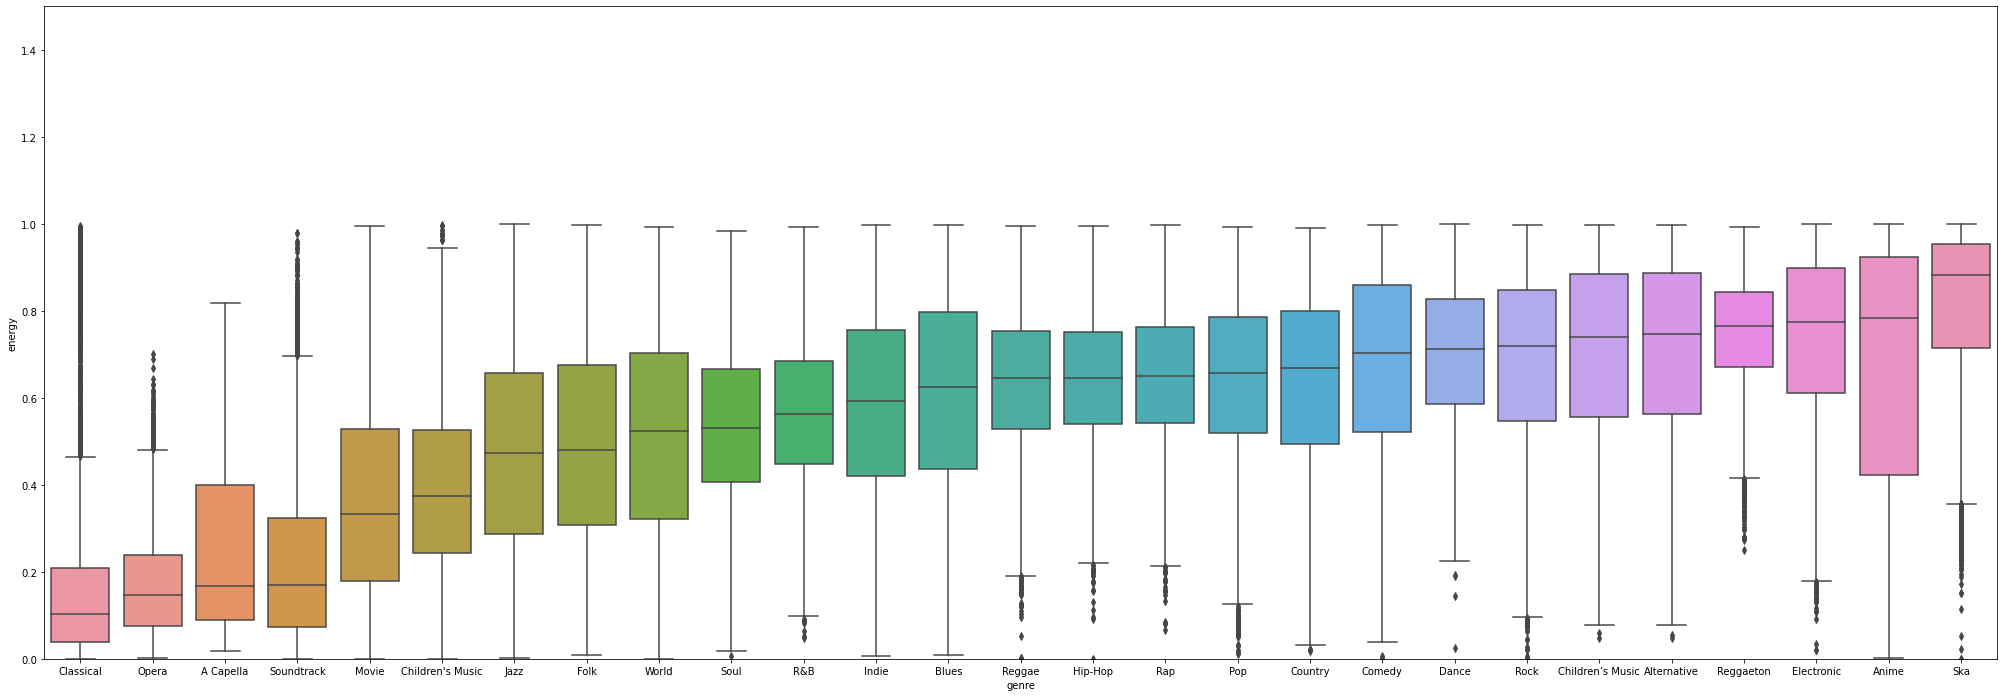

In [31]:
group_means=music.groupby(['genre'])['energy'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='genre', y='energy', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and popularity

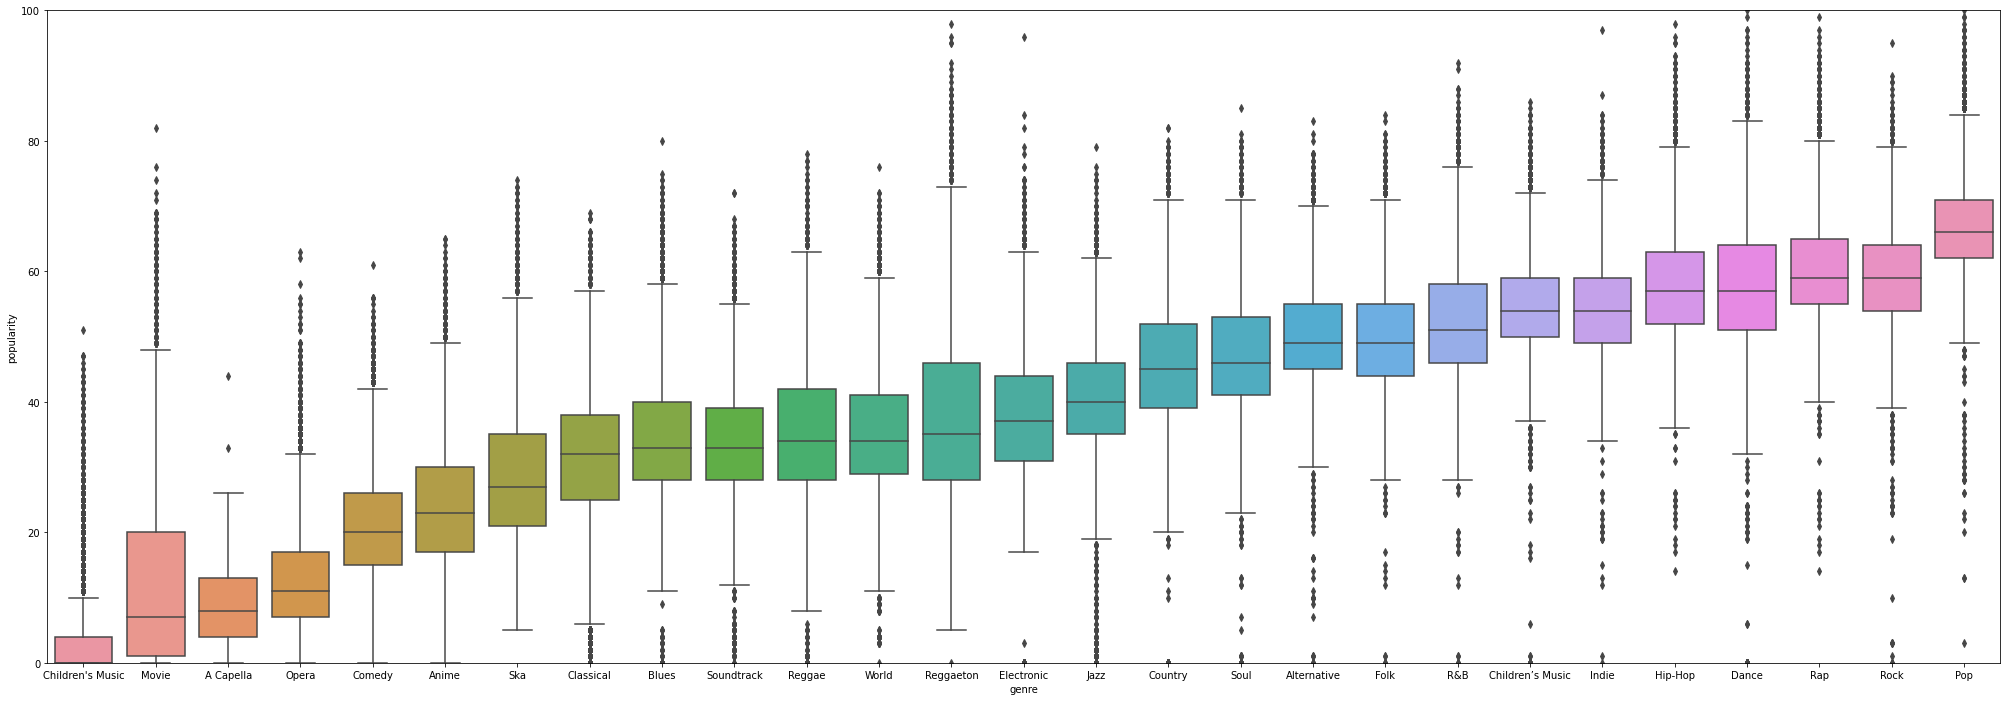

In [32]:
group_means=music.groupby(['genre'])['popularity'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,100)
sns.boxplot(x='genre', y='popularity', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and danceability

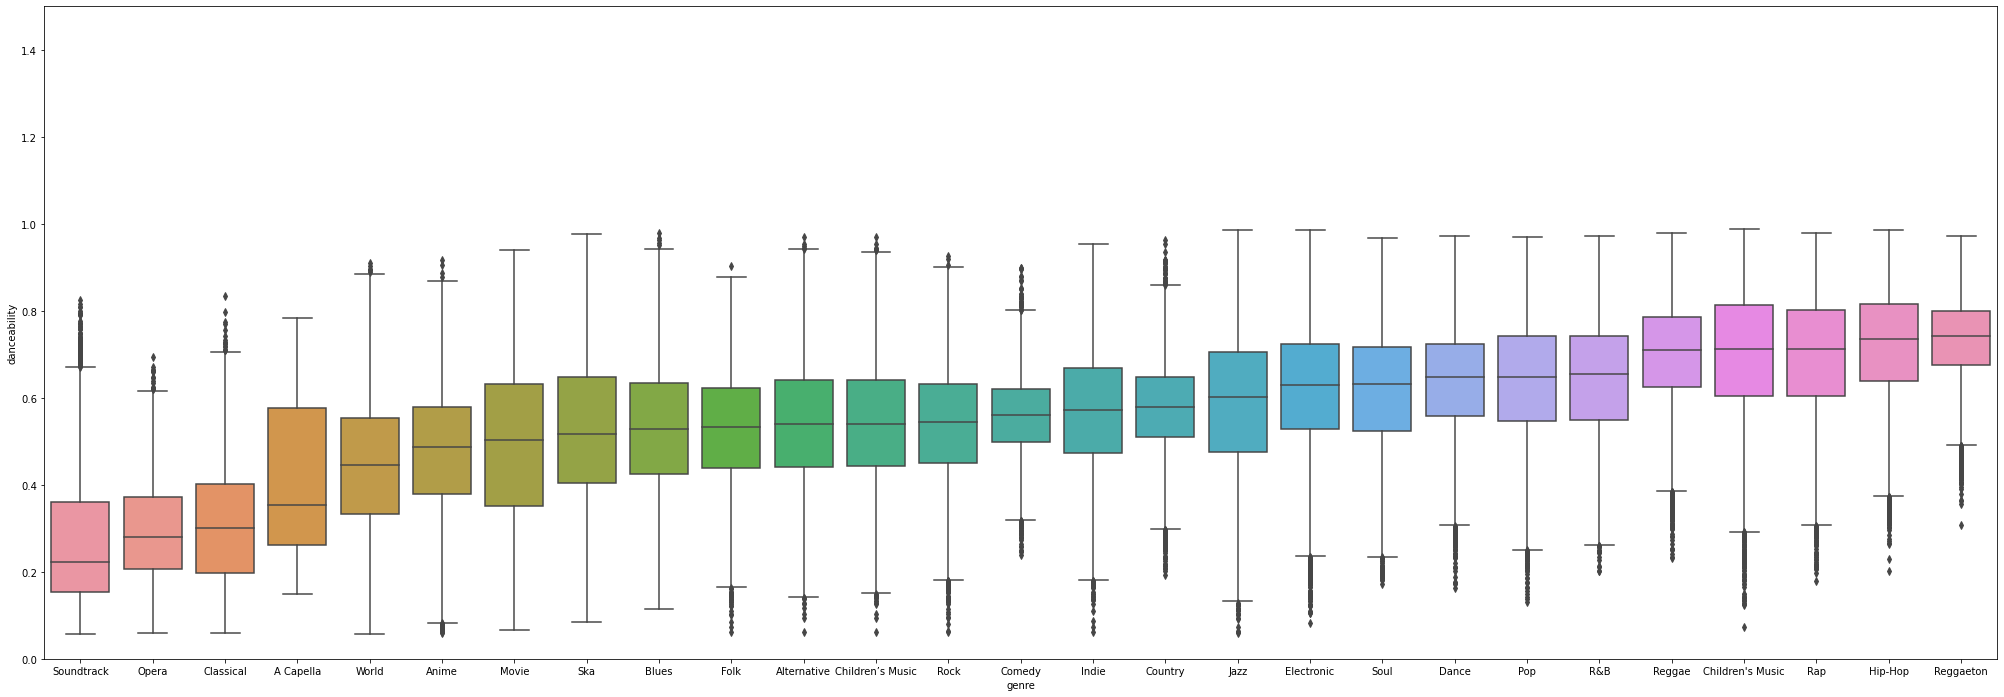

In [33]:
group_means=music.groupby(['genre'])['danceability'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='genre', y='danceability', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and duration_ms

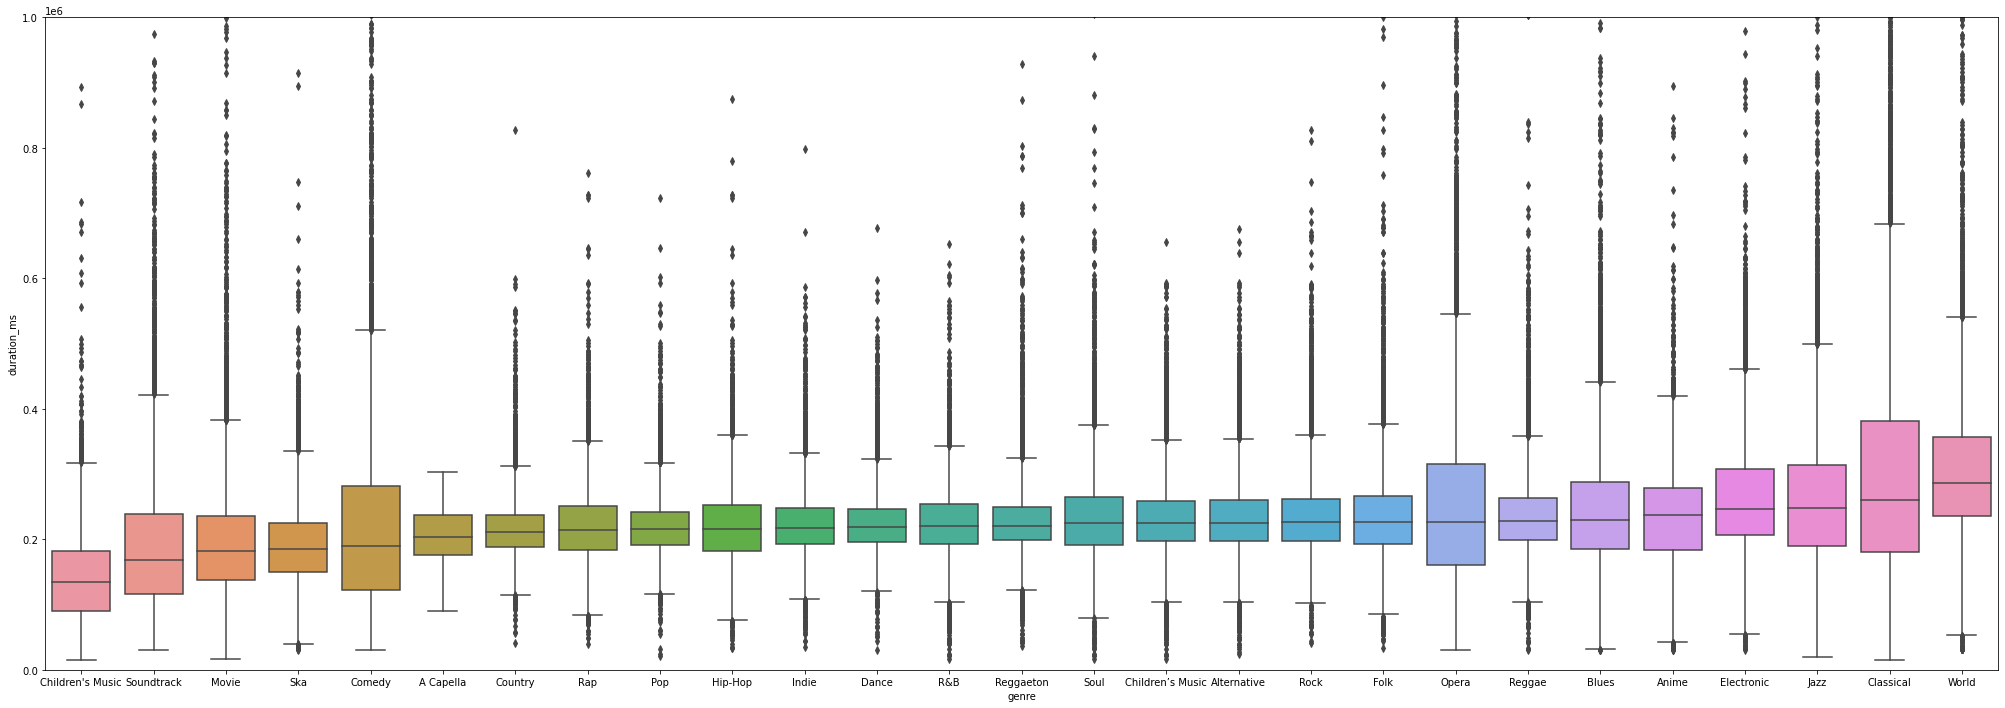

In [34]:
group_means=music.groupby(['genre'])['duration_ms'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1000000)
sns.boxplot(x='genre', y='duration_ms', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and liveness

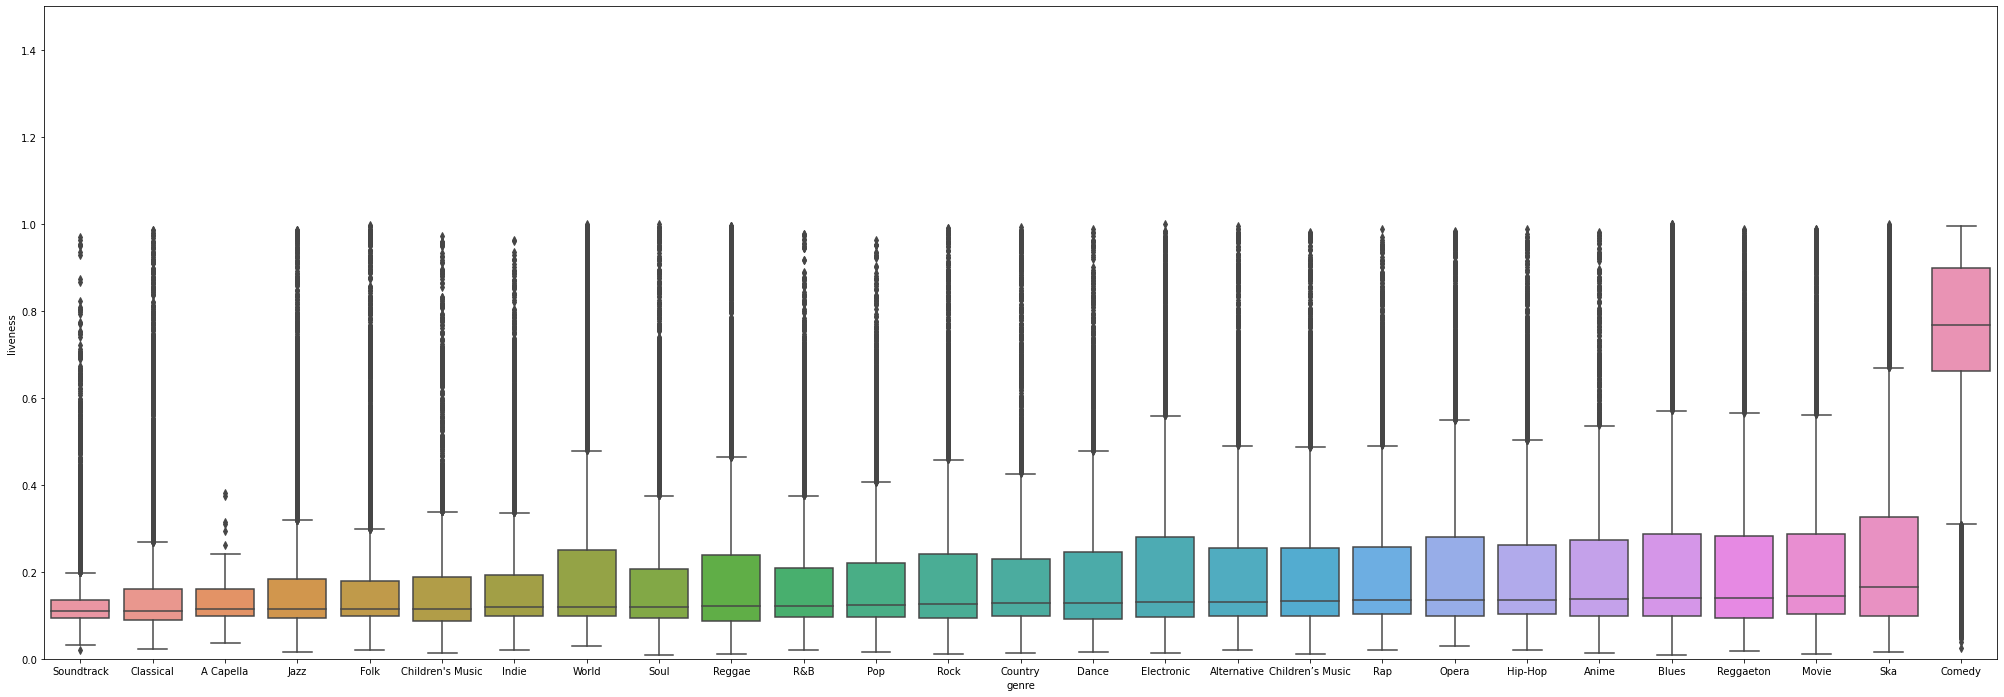

In [35]:
group_means=music.groupby(['genre'])['liveness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='genre', y='liveness', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and loudness

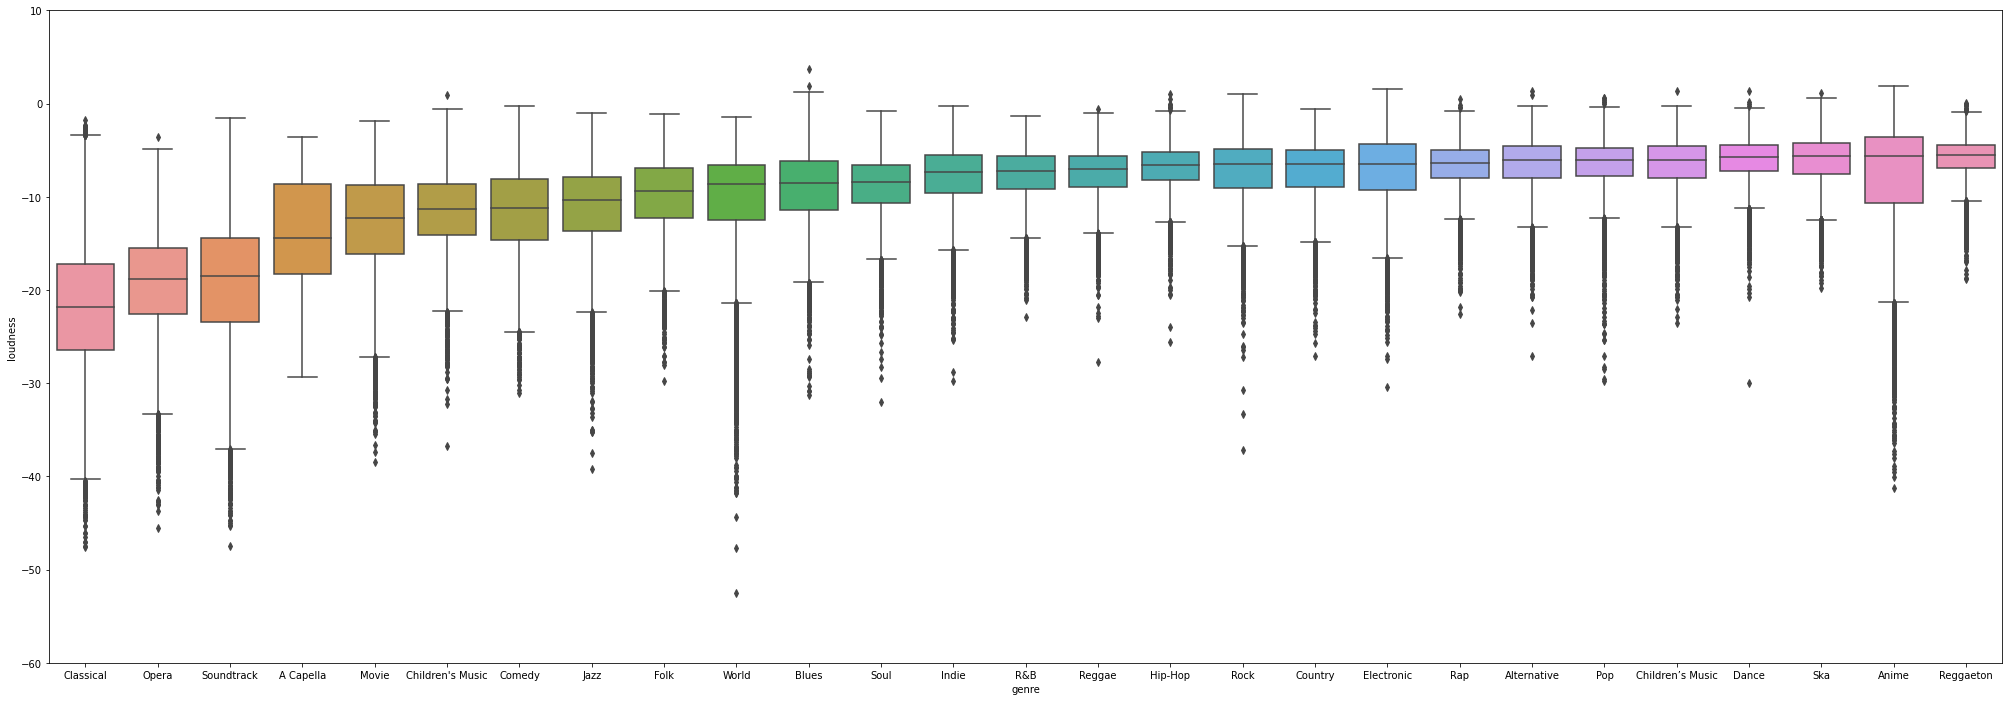

In [36]:
group_means=music.groupby(['genre'])['loudness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(-60,10)
sns.boxplot(x='genre', y='loudness', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and speechiness

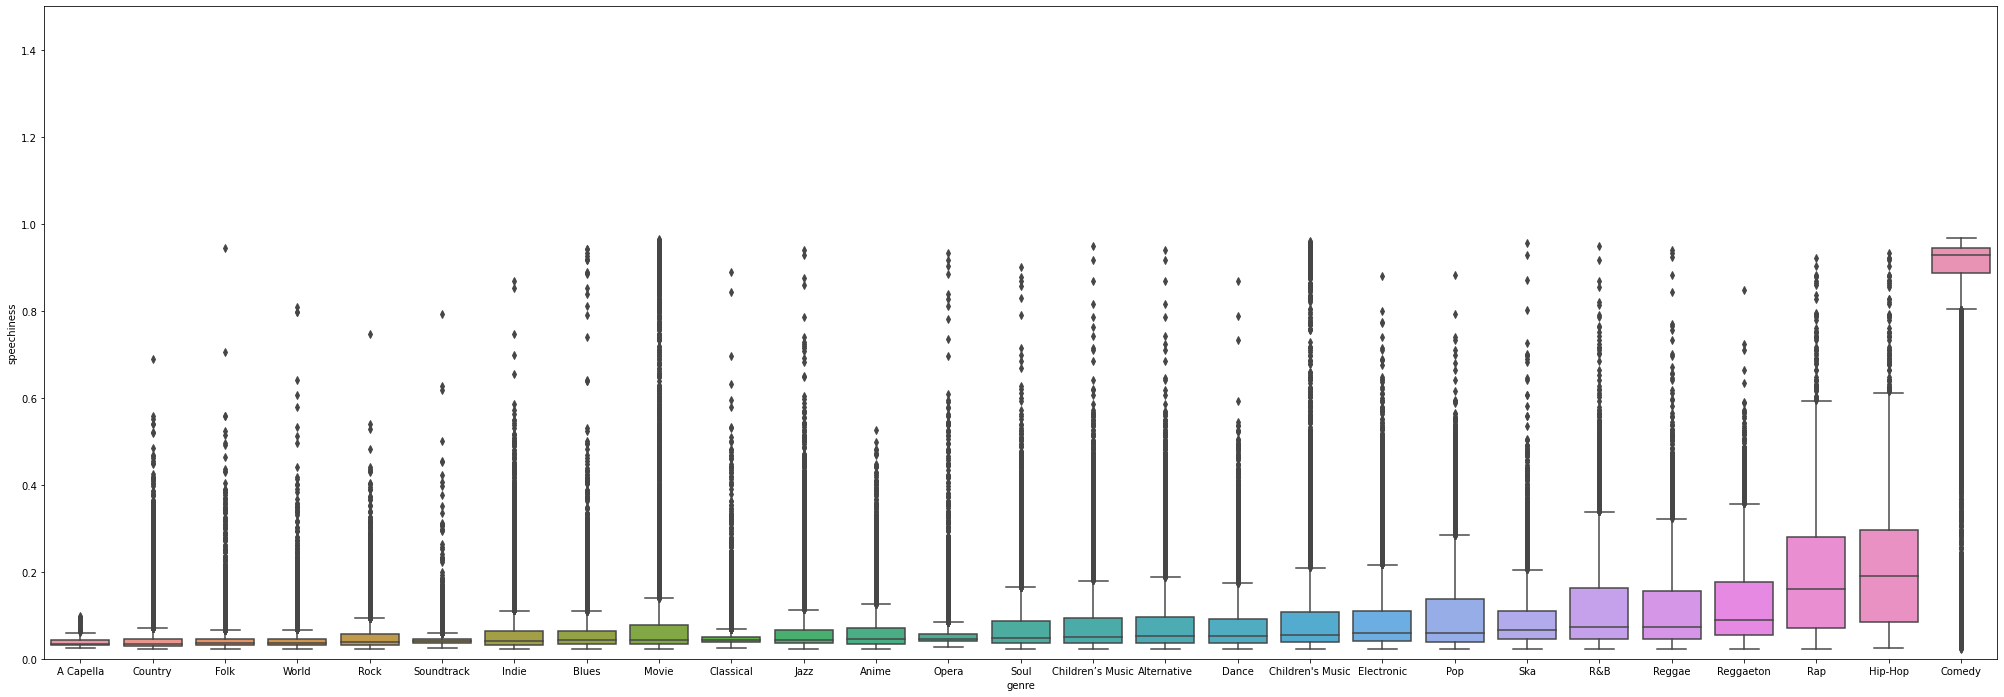

In [37]:
group_means=music.groupby(['genre'])['speechiness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='genre', y='speechiness', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and valence

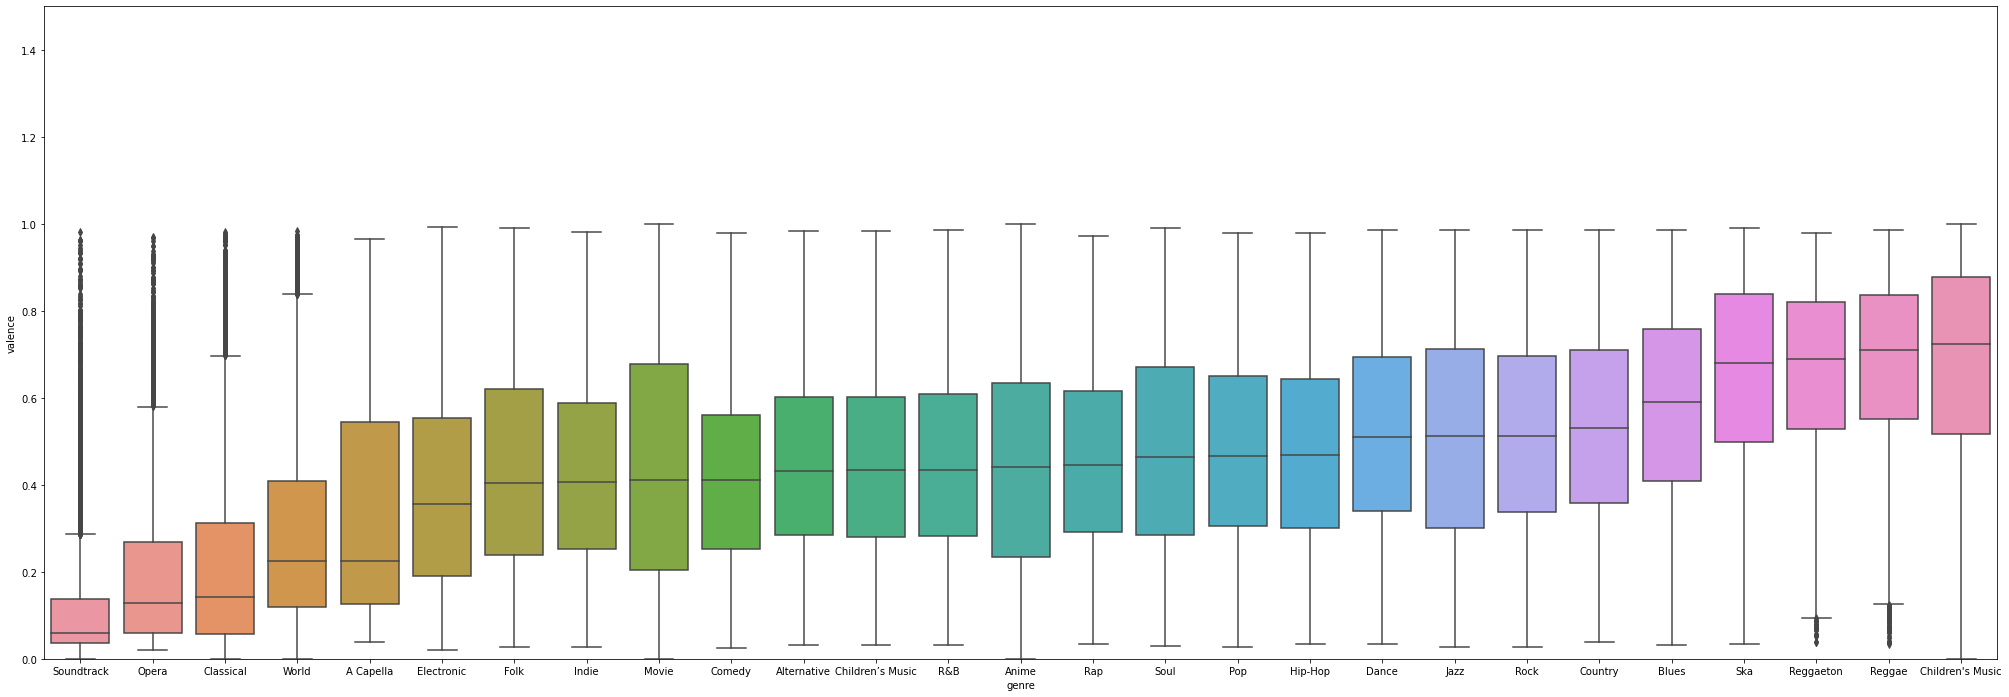

In [38]:
group_means=music.groupby(['genre'])['valence'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='genre', y='valence', order=group_means.index,data=musicdata)
plt.show()

Below are the boxplots showing the correlation between song genres and tempo

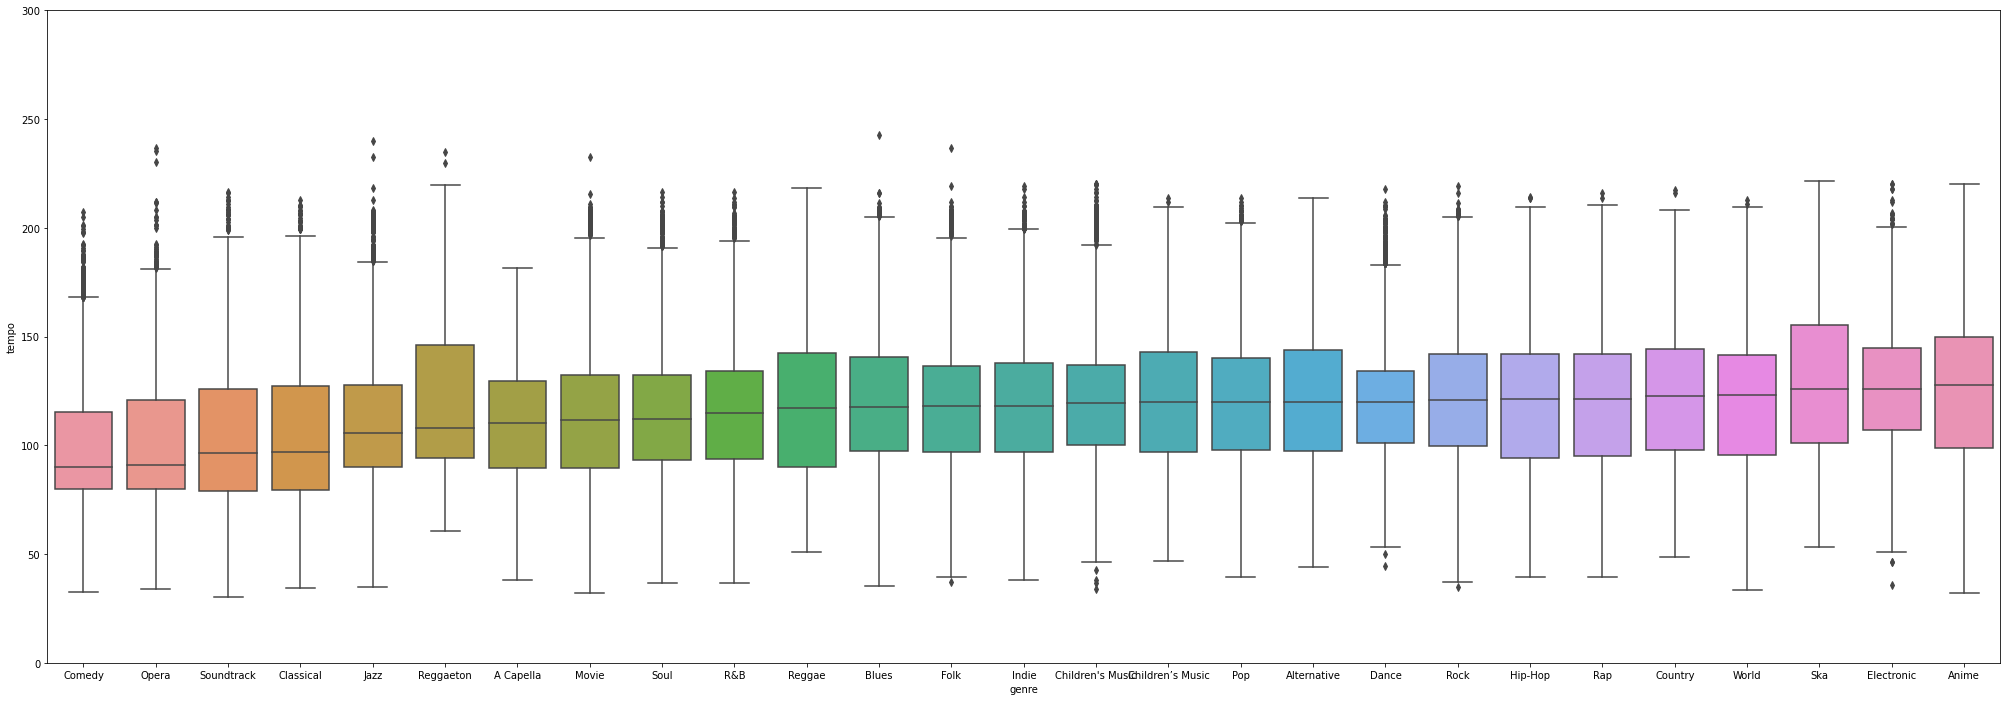

In [39]:
group_means=music.groupby(['genre'])['tempo'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,300)
sns.boxplot(x='genre', y='tempo', order=group_means.index,data=musicdata)
plt.show()

Now, we will calculate the correlation between the categorical variables and the genre. This will help us understand the relation between the variables, following which we will have a clearer idea of which variables to choose as our predictors.

The correlation will be calculated using the Chi-Square Test, which finds the probability of a null hypothesis (H0). It starts out with the hypothesis H0 : that the two categorical variables are not related to each other. It then generates the probability, called the p-value, that the hypothesis is true, i.e. they are not related to each other. 

If the returned p-value is above 0.5, usually we can assume that the two variables are not related. If the p-value falls below 0.5, they have a fairly strong correlation.

Below is the calculation of p-value for acousticness and genre.

In [40]:
music.dtypes


genre              object
popularity          int64
acousticness      float64
danceability      float64
duration_ms         int64
energy            float64
key                object
liveness          float64
loudness          float64
mode               object
speechiness       float64
tempo             float64
time_signature     object
valence           float64
dtype: object

As we can see here, the categorical variables apart from genre are 'artist_name', 'key', 'mode', and 'time signature'. We will now calculate the p-values of these variables with the categorical variable 'genre'.

For the first variable, 'artist_name', we will first observe the contingency table of genre and artist name.

In [42]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table

table = pd.crosstab(music['genre'],music['artist_name'], margins = False)
print(table)


KeyError: 'artist_name'

As we can see here, most of the expected frequencies are zero. The chi squared value cannot be calculated if the expected frequencies are zero. Hence, we will remove Artist Name from the dataset.

Below is the p-value calculation for genre and key.

In [46]:

# contingency table
table = pd.crosstab(music['genre'],music['key'], margins = False)

stat, p, dof, expected = chi2_contingency(table)
print('degrees of freedom : %d' % dof)
print("chi-square value : ",stat)
print("p-value : ",p)


degrees of freedom : 286
chi-square value :  13136.76194632049
p-value :  0.0


Below is the p-value calculation for genre and mode of the song.

In [50]:

# contingency table
table = pd.crosstab(music['genre'],music['mode'], margins = False)

stat, p, dof, expected = chi2_contingency(table)
print('degrees of freedom : %d' % dof)
print("chi-square value : ",stat)
print("p-value : ",p)


degrees of freedom : 26
chi-square value :  10474.312731930726
p-value :  0.0


Below is the p-value calculation for genre and time signature.

In [48]:

# contingency table
table = pd.crosstab(music['genre'],music['time_signature'], margins = False)

stat, p, dof, expected = chi2_contingency(table)
print('degrees of freedom : %d' % dof)
print("chi-square value : ",stat)
print("p-value : ",p)


degrees of freedom : 104
chi-square value :  33904.50648872317
p-value :  0.0


As we can see from the above calculations, the p-values for all of these variables is 0.0, which could be read to imply that the genre of the song is dependent on all these variables. However, this could also be because the frequencies or counts vary by large amounts across the columns. We will consider these variables in our prediction model because they clearly have a correlation with the genre of the song. 

# 4) Machine Learnning

We will use 2 predictive models to discover possible patterns in our dataset and make predictions based on them.

**Firstly, we have multivariate classification tree**

# 4a) Basic exploration

Perform basic statistical exploration and visualization on the Train Set.


We will start by setting up a Multi-Variate Classification problem.   

Response Variable :
 **GENRE**     

Predictor Features : 
**ACOUSTICNESS**,
**ENERGY**,
**POPULARITY**,
**VALENCE**,
**KEY**,
**MODE**,
**TIME SIGNATURE**,

In [ ]:
# Extract Response and Predictors
y = pd.DataFrame(music["genre"])
X = pd.DataFrame(music[["energy", "valence", "popularity", "acousticness"]])

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (174543, 1) (174543, 4)
Test Set  : (58182, 1) (58182, 4)


In [ ]:
# Summary Statistics for Response
y_train["genre"].value_counts()

Comedy              7244
Soundtrack          7209
Pop                 7140
Indie               7112
Jazz                7045
Rock                6999
Children’s Music    6996
Alternative         6991
Folk                6988
Electronic          6970
Hip-Hop             6956
Rap                 6933
Classical           6915
World               6839
Soul                6829
Blues               6799
R&B                 6711
Anime               6700
Reggaeton           6696
Ska                 6658
Reggae              6580
Country             6510
Dance               6506
Opera               6207
Movie               5846
Children's Music    4066
A Capella             98
Name: genre, dtype: int64

In [ ]:
# Summary Statistics for Predictors
X_train.describe()

,energy,valence,popularity,acousticness
count,174543.000000,174543.000000,174543.000000,174543.000000
mean,0.571382,0.455173,41.137932,0.368067
std,0.263562,0.259910,18.205086,0.354665
min,0.000020,0.000000,0.000000,0.000000
25%,0.386000,0.238000,29.000000,0.037500
50%,0.606000,0.444000,43.000000,0.231000
75%,0.788000,0.660000,55.000000,0.722000
max,0.999000,1.000000,99.000000,0.996000


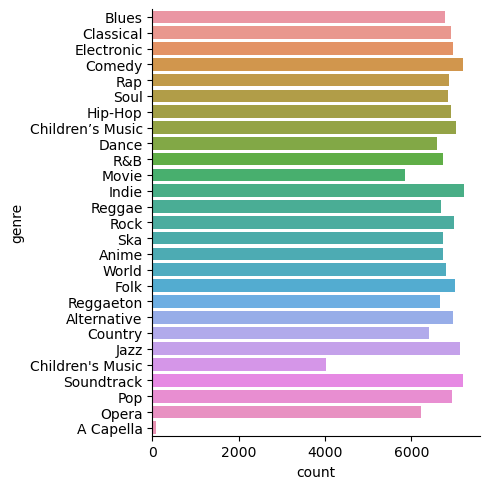

In [ ]:
# Draw the distribution of Response
sns.catplot(y = "genre", data = y_train, kind = "count")

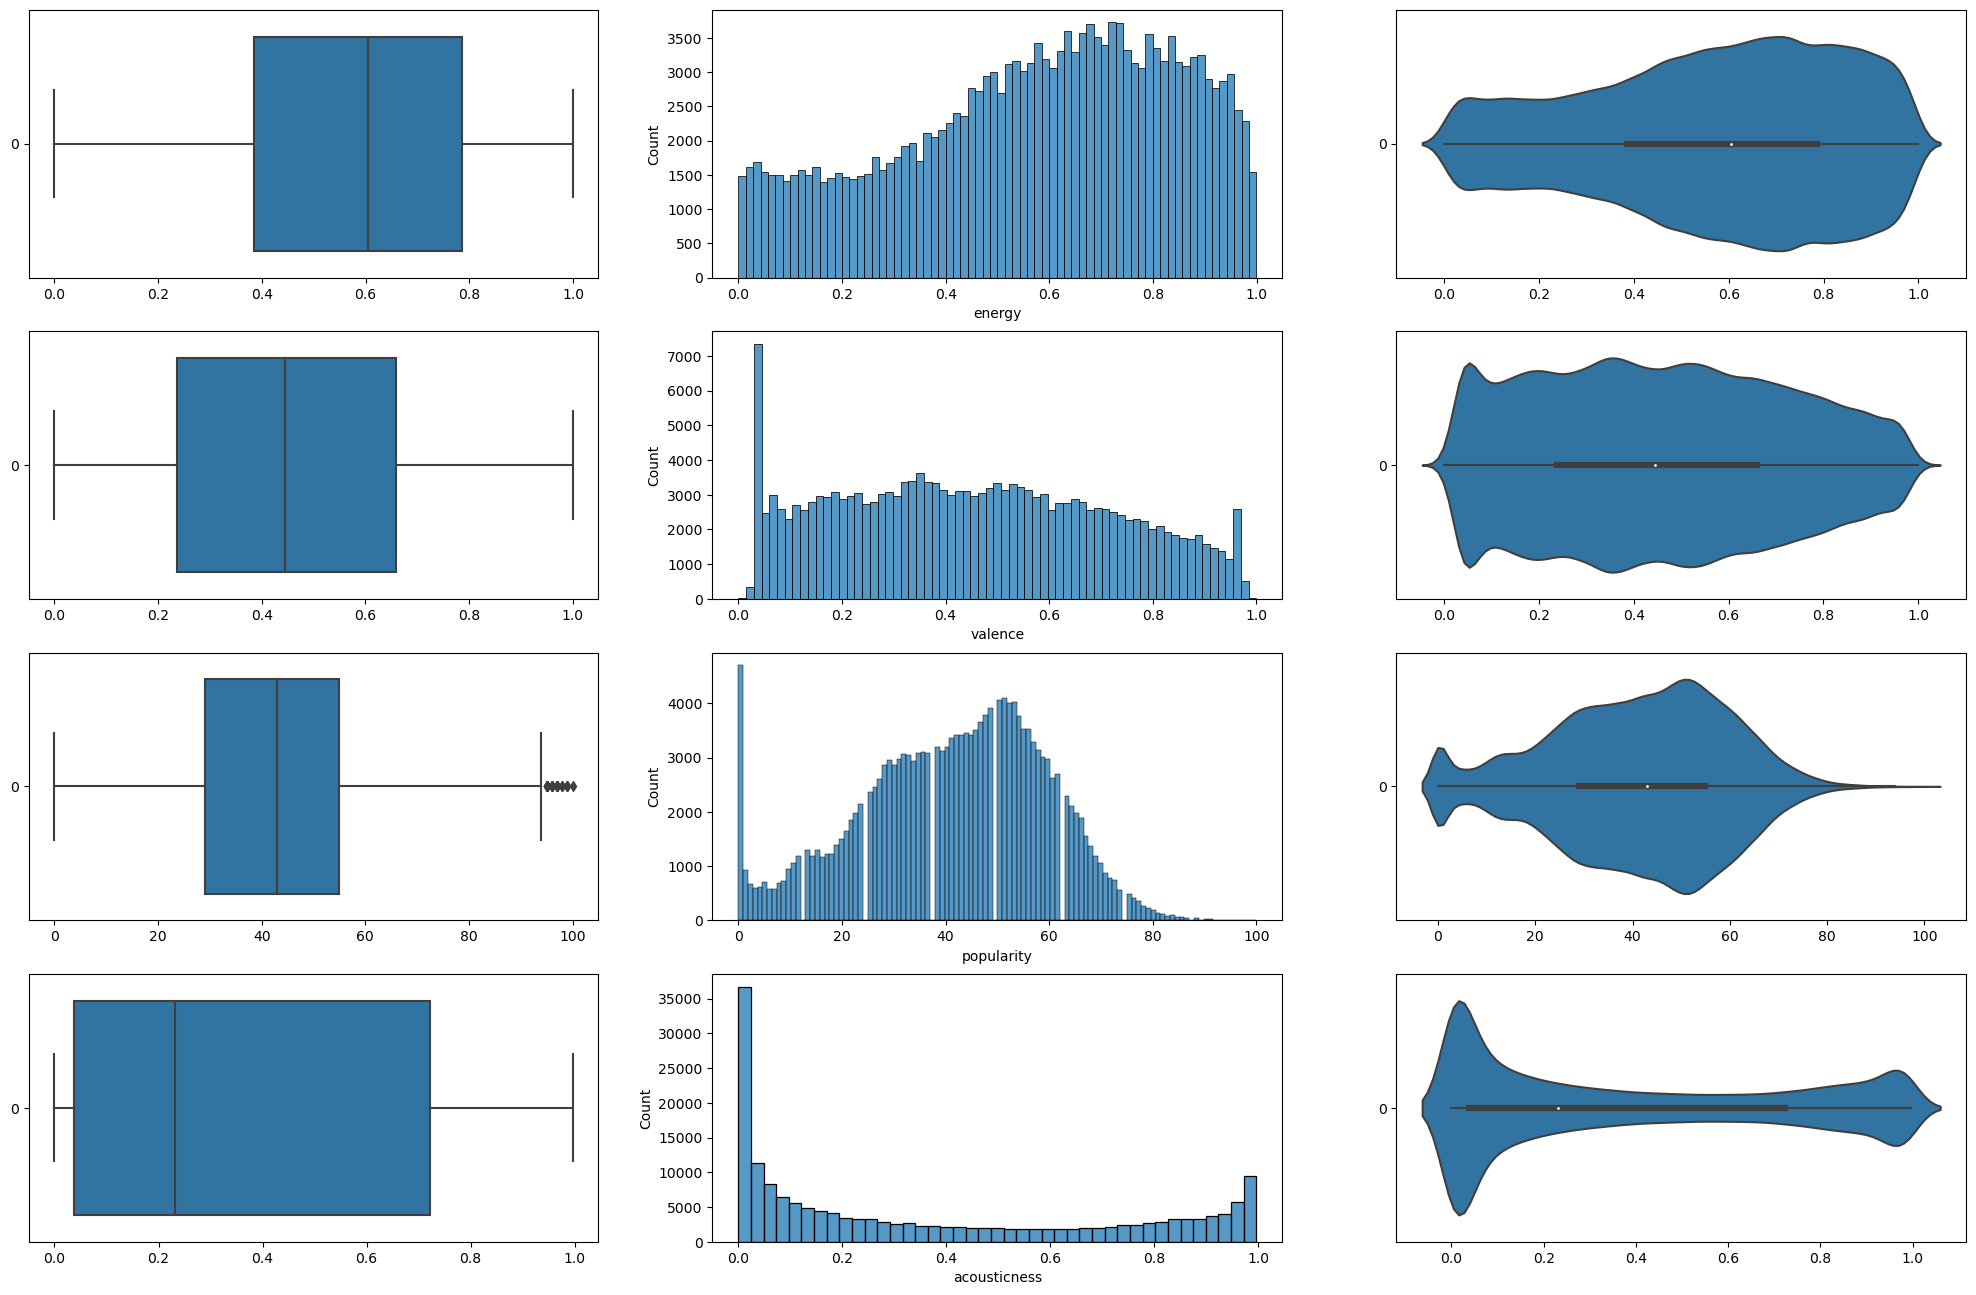

In [ ]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(25, 16))

count = 0
for var in X_train:
    sns.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sns.histplot(data = X_train[var], ax = axes[count,1])
    sns.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

## 4b) Classification Tree

In [ ]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2, random_state=0)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2, random_state=0)

IndexError: list index out of range

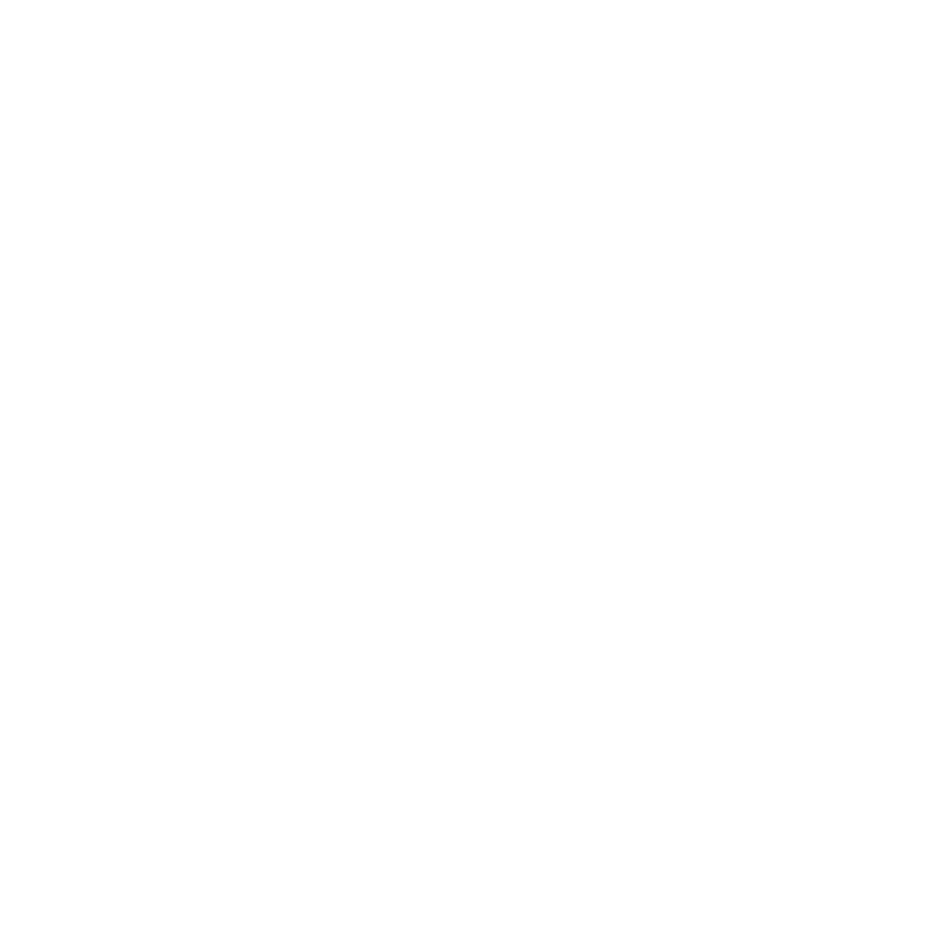

In [ ]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["genre"])

## 4c) Confusion Matrix


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.13596076611494015

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.1354714516517136



<AxesSubplot:>

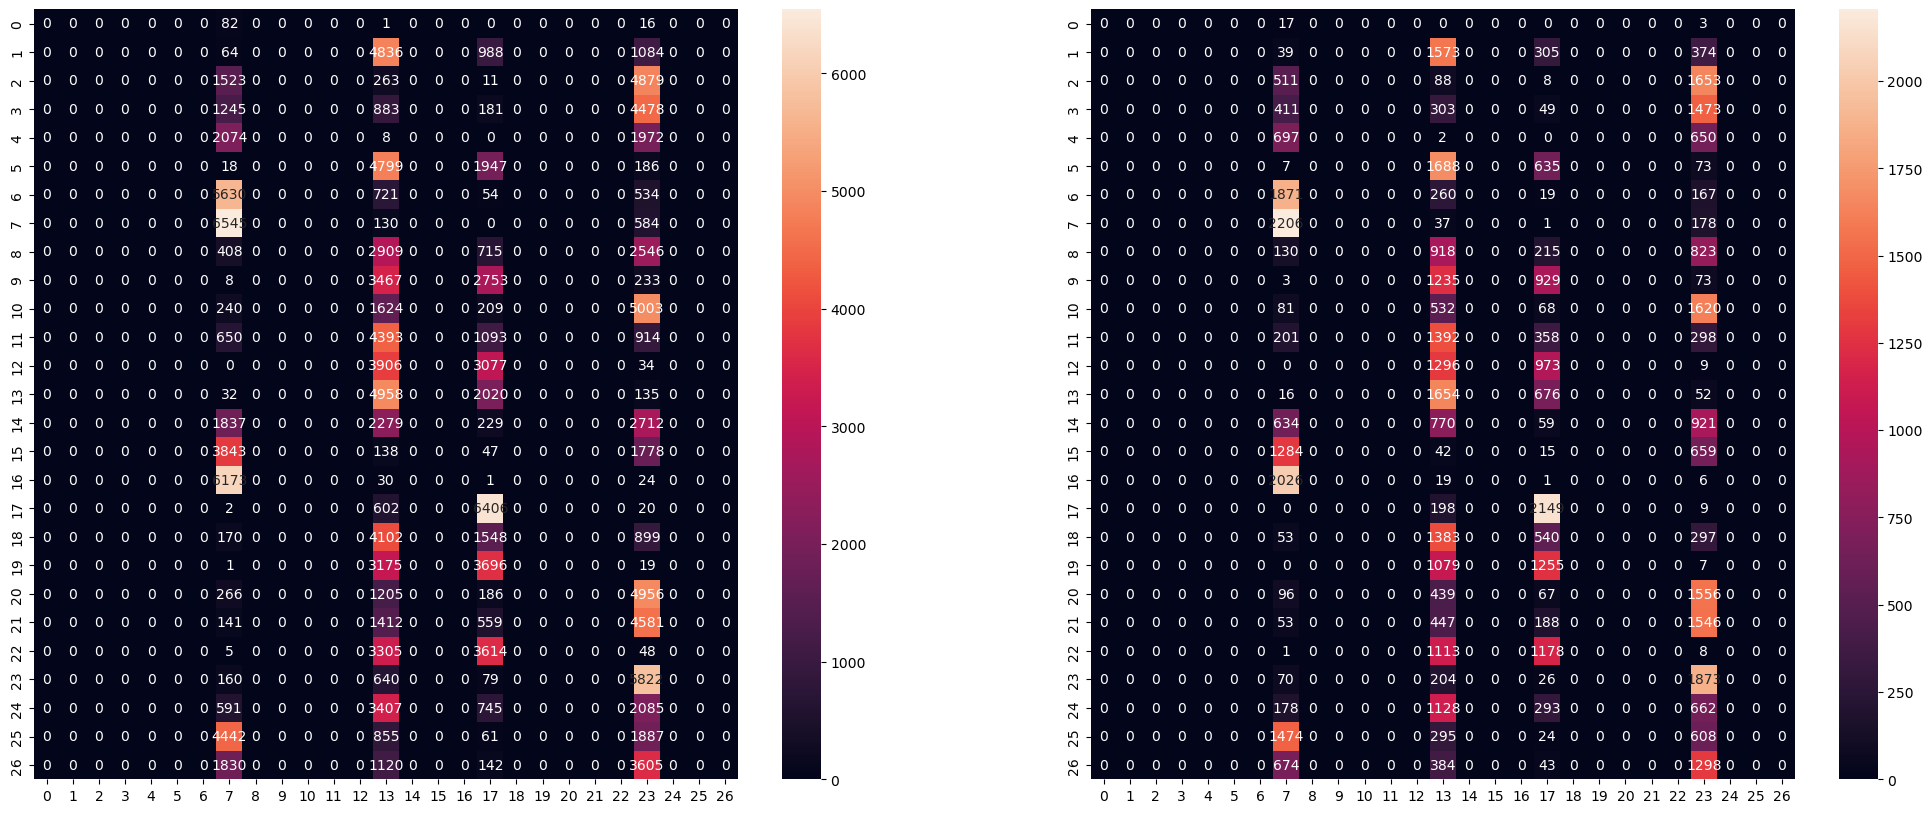

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(music['genre'])
X = pd.DataFrame(music[["energy", "valence", "popularity", "acousticness"]])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])